In [1]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
# import seaborn

# fix_yahoo_finance is used to fetch data
import fix_yahoo_finance as yf

[*********************100%***********************]  1 of 1 downloaded


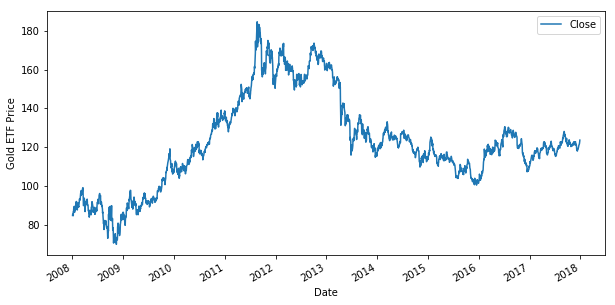

In [35]:
# Read data
Df = yf.download('GLD','2008-01-01','2017-12-31')

# Only keep close columns
'''
Df["<column>"]
-- select column <column>, return Series type.

Df[["<column>"]]
-- return a view of columns by passing a list into the __getitem__ syntax (the []'s), return Dataframe type.
'''
close_price = Df[["Close"]]

# Drop rows with missing values
close_price_clean = close_price.dropna(axis=0, how="any")

# Plot the closing price of GLD
close_price_clean.plot(figsize=(10,5))
plt.ylabel("Gold ETF Price")
plt.show()

In [48]:
# Choose the average of closing price in the past 3 days and 9 days as variables that determines the gold price of next day
'''
.shift(1)
-- copy original closing price, move down 1 unit, add to database

.rolling(window=3).mean()
-- set moving window size = 3 (including itself), this is the number of observations used for calculating the statistic
'''
close_price_clean["Shift"] = close_price_clean["Close"].shift(1)
close_price_clean["S_3"] = close_price_clean["Shift"].rolling(window=3).mean()
close_price_clean["S_9"] = close_price_clean["Shift"].rolling(window=9).mean()

# Drop rows with invalid values
close_price_clean = close_price_clean.dropna()
print close_price_clean.head(10)


                Close      Shift        S_3        S_9
Date                                                  
2008-02-11  91.330002  91.000000  89.933332  90.059999
2008-02-12  89.330002  91.330002  90.726667  90.079999
2008-02-13  89.440002  89.330002  90.553335  89.776666
2008-02-14  89.709999  89.440002  90.033335  89.558889
2008-02-15  89.150002  89.709999  89.493334  89.598889
2008-02-19  91.580002  89.150002  89.433334  89.604445
2008-02-20  93.239998  91.580002  90.146668  90.037778
2008-02-21  93.250000  93.239998  91.323334  90.514445
2008-02-22  93.389999  93.250000  92.690000  90.892223
2008-02-25  92.739998  93.389999  93.293332  91.157778


In [49]:
# Define independent variable 
past_average_price = close_price_clean[["S_3", "S_9"]]
print past_average_price.head(10)

# Define dependent variable 
current_price = close_price_clean["Close"]
print current_price.head(10)

                  S_3        S_9
Date                            
2008-02-11  89.933332  90.059999
2008-02-12  90.726667  90.079999
2008-02-13  90.553335  89.776666
2008-02-14  90.033335  89.558889
2008-02-15  89.493334  89.598889
2008-02-19  89.433334  89.604445
2008-02-20  90.146668  90.037778
2008-02-21  91.323334  90.514445
2008-02-22  92.690000  90.892223
2008-02-25  93.293332  91.157778
Date
2008-02-11    91.330002
2008-02-12    89.330002
2008-02-13    89.440002
2008-02-14    89.709999
2008-02-15    89.150002
2008-02-19    91.580002
2008-02-20    93.239998
2008-02-21    93.250000
2008-02-22    93.389999
2008-02-25    92.739998
Name: Close, dtype: float64


In [61]:
# Split dataset as training dataset and test dataset
t = 0.8
split_t = int(t * len(Df))

# Training dataset
X_train = past_average_price[:split_t]
y_train = current_price[:split_t]

# Test dataset
X_test = past_average_price[split_t:]
y_test = current_price[split_t:]
print X_test.head(10)

                   S_3         S_9
Date                              
2016-02-10  113.243335  109.908889
2016-02-11  113.956668  110.788889
2016-02-12  115.700000  112.134444
2016-02-16  117.293333  113.280000
2016-02-17  117.396665  114.022222
2016-02-18  116.203334  114.714445
2016-02-19  116.180000  115.572223
2016-02-22  117.116669  116.156667
2016-02-23  117.120000  116.341111
2016-02-24  116.763334  116.745556


In [58]:
# Fit the linear regression model
regression_model = LinearRegression().fit(X_train, y_train)

# Coefficients and intercept
coefficient = regression_model.coef_
intercept = regression_model.intercept_
print "Gold ETF Price =", coefficient[0], "* 3 Days Moving Average +", coefficient[1], "* 9 Days Moving Average +", intercept

Gold ETF Price =  1.1993180235059262 * 3 Days Moving Average + -0.20245809442696594 * 9 Days Moving Average + 0.4044385259312975


In [64]:
# Predict gold price in the test dataset
predicted_price = regression_model.predict(X_test)
predicted_price_df = pd.DataFrame(predicted_price, index = y_test.index, columns = ["predicted_price"])
print predicted_price_df.head(10)

            predicted_price
Date                       
2016-02-10       113.967267
2016-02-11       114.644617
2016-02-12       116.463008
2016-02-16       118.141994
2016-02-17       118.115653
2016-02-18       116.544323
2016-02-19       116.342675
2016-02-22       117.347713
2016-02-23       117.314366
2016-02-24       116.804726


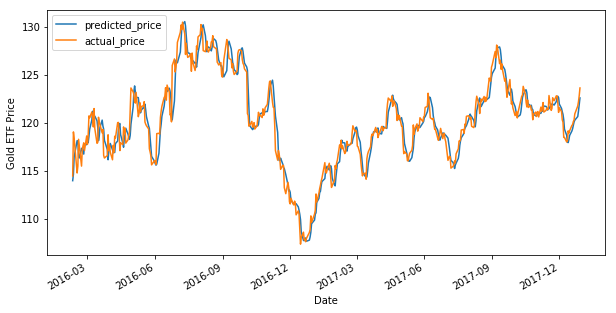

In [65]:
# Plot the predicted closing price of GLD
predicted_price_df.plot(figsize=(10,5))
y_test.plot()
plt.legend(["predicted_price", "actual_price"])
plt.ylabel("Gold ETF Price")
plt.show()

In [69]:
r2_score = regression_model.score(X_test, y_test)
print r2_score

0.9303577182001186
